In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/diabetes_.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)


   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose    

In [20]:
df.columns
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [21]:
x = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

In [ ]:
def train_test_split_scratch(x,y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(len(x))
  np.random.shuffle(indices)

  split = int (len(x)* test_size)
  test_idx = indices[:split]
  train_idx = indices[split:]
  x_test , y_test = x[test_idx] ,y[test_idx] #30
  x_train , y_train = x[train_idx] ,y[train_idx] #70

  return x_train, x_test, y_train, y_test

In [23]:
x_train, x_test, y_train, y_test = train_test_split_scratch(x, y)

In [ ]:
def euclidean_distance(a, b):
  if a.shape != b.shape: 
    raise ValueError("CALCULATE DISTANCE must have the same dimension.")
  return np.sqrt(np.sum((a - b) ** 2))

In [26]:
def knn_predict_single(query, x_train, y_train, k=3):
  distance = [euclidean_distance(query, x )for x in x_train]
  nearest_indices = np.argsort(distance)[:k]
  nearest_labels = y_train [nearest_indices]

  return np.bincount(nearest_labels).argmax()

In [27]:
def knn_predict(x_test, x_train, y_test, k=3):
  return np.array([knn_predict_single(x,x_train,y_train, k)for x in x_test])


In [ ]:
def compute_accuracy(y_true, y_pred): #labels
  return (np.sum(y_true == y_pred) / len(y_true)) * 100

In [ ]:
predictions = knn_predict(x_test, x_train, y_train, k=3) #P TEST LABEL
accuracy = compute_accuracy(y_test, predictions) #UNSCAL PRI


print(f"Accuracy (Unscaled Data): {accuracy:.2f}%")

Accuracy (Unscaled Data): 70.43%


In [30]:
def min_max_scaling(x):
  return (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

X_scaled = min_max_scaling(x)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

In [31]:
scaled_predictions = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
scaled_accuracy = compute_accuracy(y_test_s, scaled_predictions)


print(f"Accuracy (Scaled Data): {scaled_accuracy:.2f}%")

Accuracy (Scaled Data): 75.22%


In [ ]:

k_values = range(1, 16) #15
acc_original = []
acc_scaled = []

for k in k_values:
  pred_o = knn_predict(x_test, x_train, y_train, k)
  acc_original.append(compute_accuracy(y_test, pred_o))
  pred_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
  acc_scaled.append(compute_accuracy(y_test_s, pred_s))
print(acc_original)


[np.float64(66.95652173913044), np.float64(70.86956521739131), np.float64(70.43478260869566), np.float64(72.17391304347827), np.float64(66.95652173913044), np.float64(70.0), np.float64(69.56521739130434), np.float64(71.30434782608695), np.float64(70.0), np.float64(72.17391304347827), np.float64(71.73913043478261), np.float64(72.60869565217392), np.float64(72.60869565217392), np.float64(73.04347826086956), np.float64(72.17391304347827)]
[np.float64(66.95652173913044), np.float64(70.86956521739131), np.float64(70.43478260869566), np.float64(72.17391304347827), np.float64(66.95652173913044), np.float64(70.0), np.float64(69.56521739130434), np.float64(71.30434782608695), np.float64(70.0), np.float64(72.17391304347827), np.float64(71.73913043478261), np.float64(72.60869565217392), np.float64(72.60869565217392), np.float64(73.04347826086956), np.float64(72.17391304347827)]


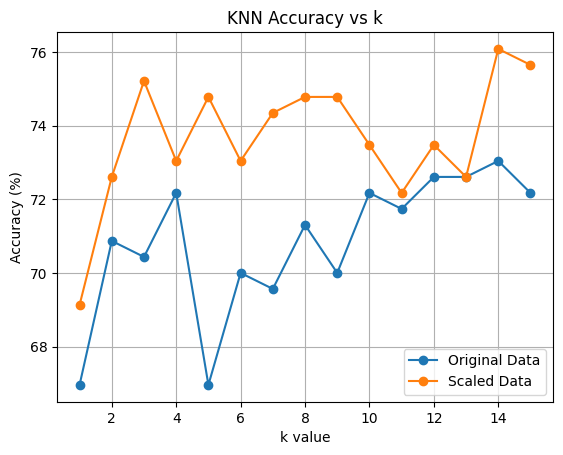

In [34]:
plt.plot(k_values, acc_original, marker='o', label='Original Data')
plt.plot(k_values, acc_scaled, marker='o', label='Scaled Data')
plt.xlabel('k value')
plt.ylabel('Accuracy (%)')
plt.title('KNN Accuracy vs k')
plt.legend()
plt.grid(True)
plt.show()